In [1]:
library(ggplot2)

In [2]:
res= read.delim('/nfs/team292/vl6/FetalReproductiveTract/fGWAS/adult_endometrium/GCST90205183/forest_GCST90205183_noatac.tsv', sep = '\t', row.names = NULL, stringsAsFactors = F)
names(res)[1:4] = c('celltype', 'logOR', 'CI_lower95', 'CI_upper95')
res = subset(res, ! celltype %in% c('Immune_Myeloid', 'Immune_Lymphoid') )

res = res[order(res$CI_lower95), ]
res$significant = ifelse(res$FDR < 0.05 & res$logOR > 0, '< FDR 0.05', 'no')
head(res)


,celltype,logOR,CI_lower95,CI_upper95,P.value,FDR,significant
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
24,Plasma_B_Cell,-3.453359,-6.602697,-0.3040211,0.031617883,0.06982282,no
39,ePV_1a,-2.801400,-4.592135,-1.0106660,0.002168003,0.02054433,no
3,CD4_T,-2.600258,-4.361426,-0.8390896,0.003805854,0.02054433,no
52,uNK3,-2.390607,-3.962562,-0.8186515,0.002875532,0.02054433,no
25,Red_Blood_Cell,-2.282707,-3.936531,-0.6288819,0.006824110,0.02085742,no
51,uNK2,-2.336350,-3.914677,-0.7580233,0.003715828,0.02054433,no


In [3]:
res$lineage = 'Immune'
res$lineage[ res$celltype %in% c('preCiliated',
'SOX9_basalis',
'SOX9_functionalis_I',
'SOX9_functionalis_II',
'SOX9_luminal',
'SOX9_basalis',
'Cycling',
'Ciliated',
'preGlandular',
'preLuminal',
'Glandular',
'Luminal',
'Glandular_secretory',
'Glandular_secretory_FGF7',
'MUC5B',
'KRT5',
'Luminal') ] = 'Epithelial'
res$lineage[ res$celltype %in% c('ePV_2',
'eStromal',
'eStromal_cycling',
'eStromal_MMPs',
'mPV',
'uSMCs',
'ePV_1a',
'ePV_1b',
'Fibroblast_basalis',
'dStromal_early',
'dStromal_mid',
'dStromal_late') ] = 'Mesenchymal'
res$lineage[ res$celltype %in% c("Arterial", "Venous",  "Lymphatic"   ) ] = 'Endothelial'
res$colors = c('#e0b282', '#199de5', '#6fb07f', '#d59adb')[ match(res$lineage, c('Endothelial','Epithelial','Immune','Mesenchymal') )]
res$colors[ res$significant == 'no' ] = '#0a0a0a'

In [4]:
res$celltype = gsub(res$celltype, pattern = '_', replacement = ' ')
res$celltype = factor(res$celltype, levels = res$celltype)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


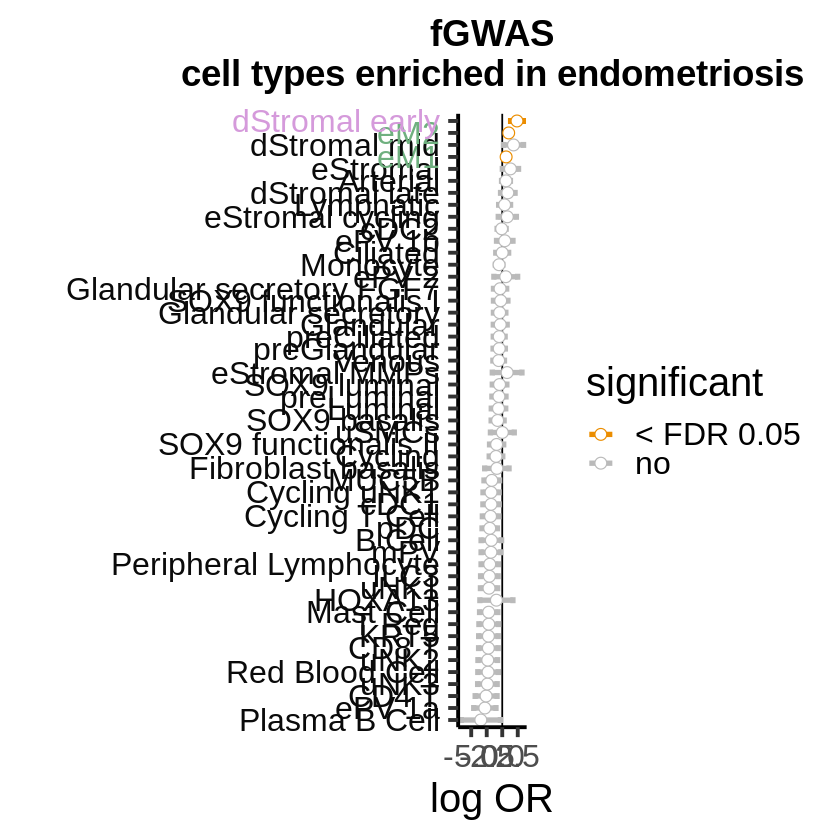

In [5]:
ggplot(res, aes(y=logOR, x=celltype)) + 
    geom_hline(yintercept = 0) +
    geom_errorbar(aes(ymin=CI_lower95, ymax=CI_upper95, color=significant), width=.5, size = 1.5) +
    geom_point(aes(color=significant), size=3, shape=21, fill="white") +
    ylab('log OR')+
    xlab('')+
    coord_flip() + scale_color_manual(values = c('#eb8d00', '#bababa') ) +
    ggtitle("fGWAS\ncell types enriched in endometriosis") +
    theme_classic(24) +
     theme(axis.text.y = element_text(color = res$colors),
          plot.title = element_text(hjust = 0.5, size=22, face = "bold"))
ggsave('/nfs/team292/lg18/endometriosis/plots/cells/fGWAS.pdf', width = 10, height = 15, dpi = 300)
ggsave('fGWAS.pdf', width = 10, height = 15, dpi = 300)
